In [33]:
# importing necessary libraries and loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
heart = r'C:\Users\SamDutse\Downloads\heart.csv'
data = pd.read_csv(heart)

In [6]:
# Displaying the first five and last five rows of the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- Age
- sex
- Chest Pain (4 values)
    - 0: Typical Angina
    - 1: Atypical Angina
    - 2: Non-anginal pain
    - 3: Assymptomatic
- trestbps: Resting blood pressure (in mm Hg on addmission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)
    - 1: True
    - 0: False
- restecg: resting electrocardiogram results
    - 0: Normal
    - 1: Having ST-T wave abnormality (T wave inversion and/or ST elevation or depression of > 0.05mV)
    -2: showing probable or definite left ventricular hypertrophy by Este's criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina
    - 1: Yes
    - 0: No
- oldpea: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- ca: number of major vesels (0-3) colored by fluoroscopy
- thal:
    - 3: normal
    - 6: fixed defect
    - 7: reversable defect
- target: 
    - 0: less chance of heart attack
    - 1: more chances of heart attack

In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
# finding the shape of the data
data.shape

(1025, 14)

In [10]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 1025
Number of columns: 14


In [11]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
# number of null values in data
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
# checking for duplicate data and dropping them if any
data_dupl = data.duplicated().any()
data_dupl

True

In [23]:
# number of duplicated
data.duplicated().sum()

723

In [26]:
checking duplicated rows or data
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**NB**: if there was a unique indentifier we would have confirm the duplications using the identifier

In [27]:
# dropping the duplicated data
data = data.drop_duplicates()
data.shape

(302, 14)

In [118]:
# getting overall statistics about dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


<AxesSubplot:>

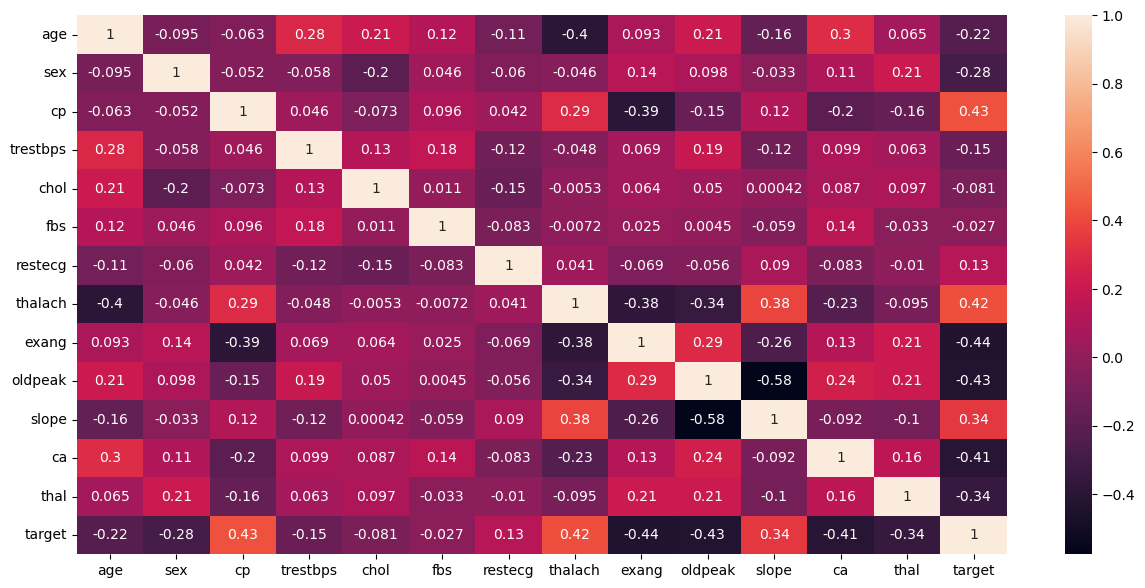

In [119]:
# getting data correlation
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

In [35]:
# number of people with heart disease and those without
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [38]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

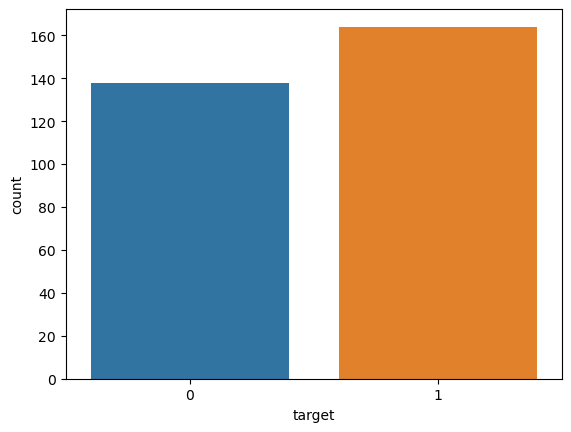

In [69]:
sns.countplot(data=data, x ='target')

In [51]:
# finding count of male and female in the data
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

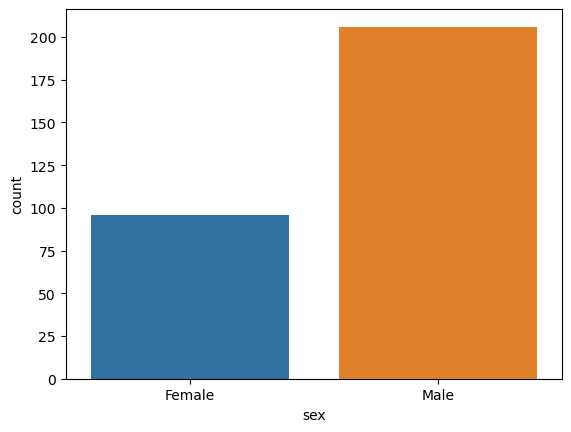

In [70]:
sns.countplot(data=data, x='sex')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

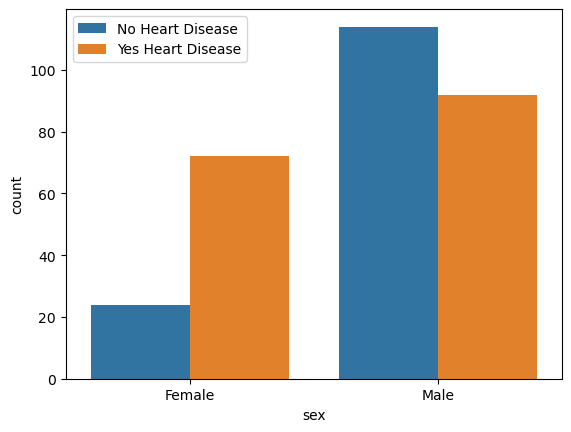

In [64]:
# finding gender distribution according to the target variable
sns.countplot(x='sex', hue='target', data=data)
plt.legend(labels=(['No Heart Disease', 'Yes Heart Disease']))
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

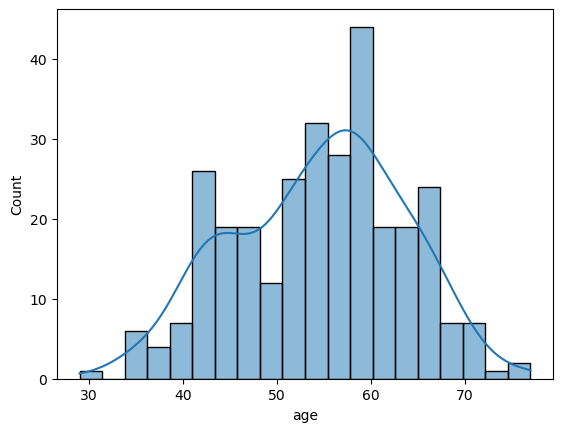

In [74]:
# checking age distribution in dataset
sns.histplot(data['age'], bins=20, kde=True)

In [75]:
# checking chest pain type
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [80]:
data['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

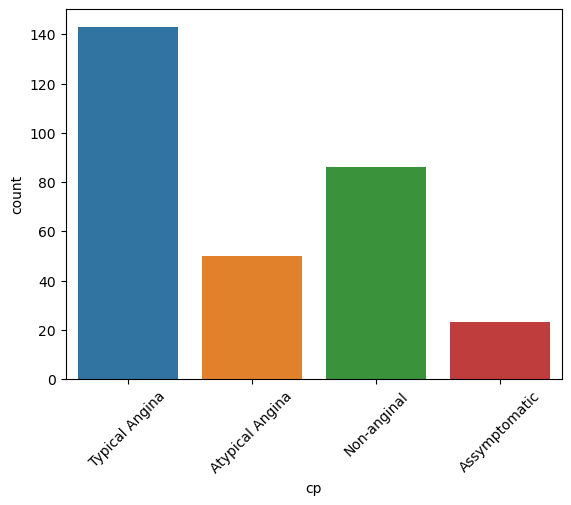

In [85]:
sns.countplot(data=data, x='cp')
plt.xticks([0,1,2,3],['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Assymptomatic'])
plt.xticks(rotation=45)
plt.show()

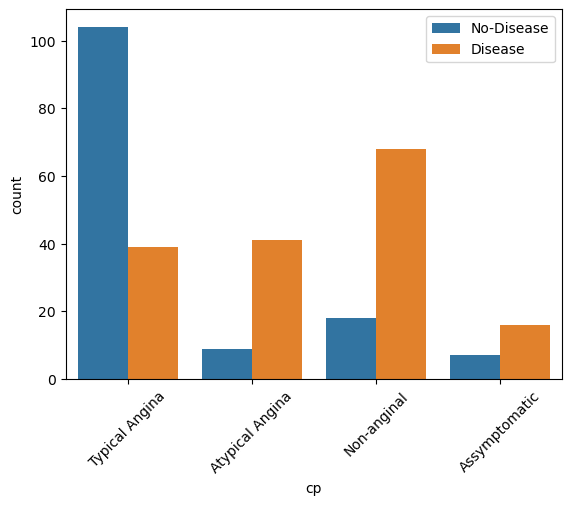

In [89]:
# checking chest pain distribution as per our target variables
sns.countplot(data=data, x='cp', hue='target')
plt.legend(labels=['No-Disease', 'Disease'])
plt.xticks([0,1,2,3],['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Assymptomatic'])
plt.xticks(rotation=45)
plt.show()

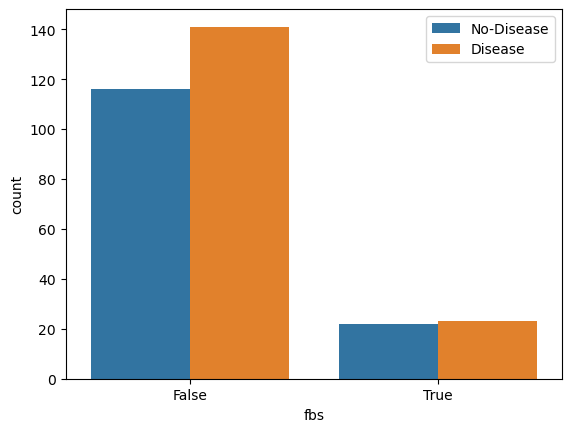

In [92]:
# show fasting blood sugar distribution according to target variables
# checking chest pain distribution as per our target variables
sns.countplot(data=data, x='fbs', hue='target')
plt.legend(labels=['No-Disease', 'Disease'])
plt.xticks([0,1],['False', 'True'])
plt.show()

In [93]:
# checking resting blood pressure distribution
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

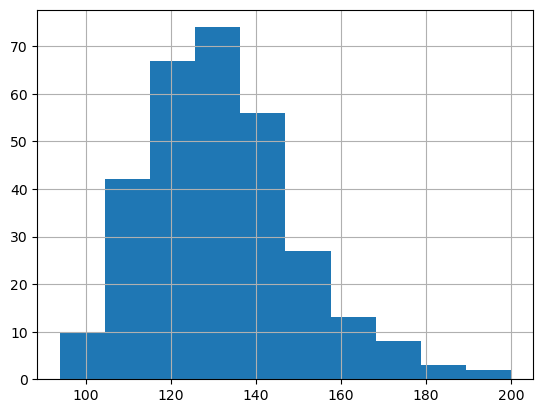

In [96]:
data['trestbps'].hist()

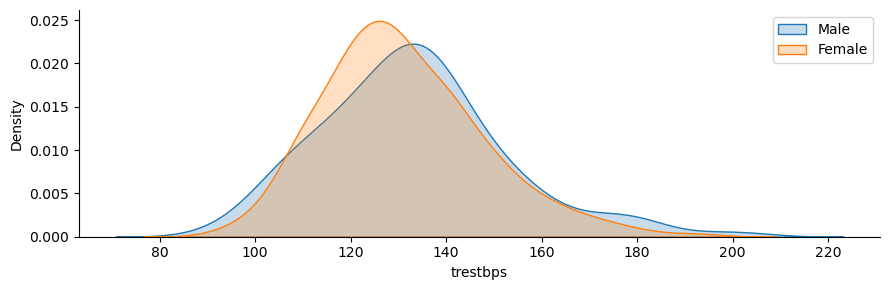

In [101]:
# comparing resting blood pressure with respect to sex
g = sns.FacetGrid(data, hue='sex', aspect=3)
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=['Male', 'Female'])
plt.show()

<AxesSubplot:>

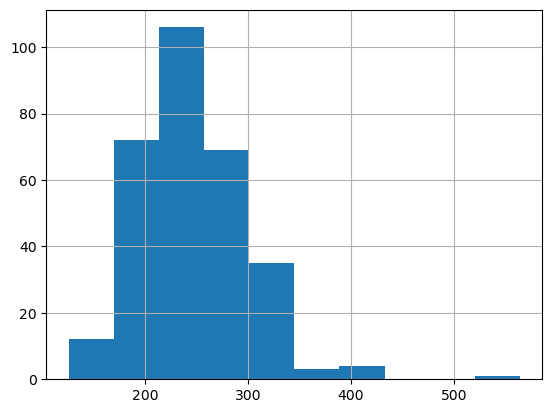

In [121]:
# showing distribution of serum cholesterol
data['chol'].hist()

In [104]:
# plotting columns with continous values
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [105]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [106]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

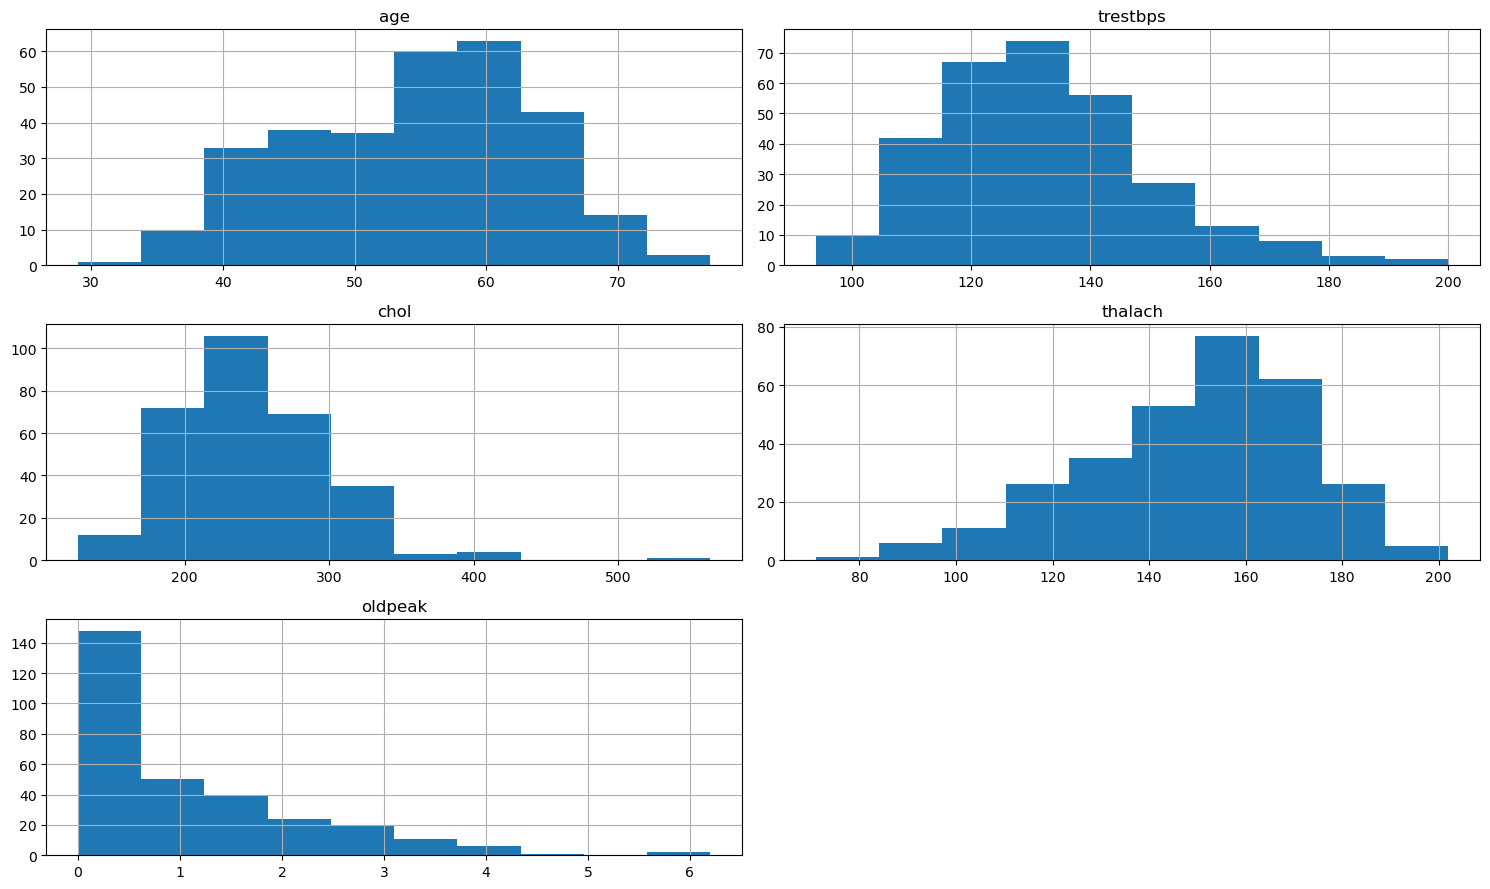

In [112]:
data.hist(cont_val, figsize= (15,9))
plt.tight_layout()
plt.show()